# ARIMA Model

In [13]:
!pip install cuml

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [36 lines of output]
      running bdist_wheel
      running build
      /home/tipparn/documents/school/masterthesis/project/.venv/lib/python3.11/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      installing to build/bdist.linux-x86_64/wheel
      running install
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-77hydfxl/cuml_8b38036a84764b8aad25896525e23a36/setup.py", line 18, in <module>
          setup(name=pkg,
        File "/home/tipparn/documents/school/masterthesis/project/.venv/lib/python3.11/site-packages/setuptools/__init__.py", line 87, in setup
       

In [12]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from pandas import DataFrame

from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima
from pandas.plotting import lag_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from cuml.tsa.arima import ARIMA
from sklearn.metrics import mean_squared_error ,r2_score 
from statsmodels.tools.eval_measures import rmse

ModuleNotFoundError: No module named 'cuml'

# Load and PreProcess 

In [2]:
data = pd.read_csv('data/PMS_data.csv',nrows=100000)

In [3]:
data.head()

,Flow,Occupy,Speed
0,133.0,0.0603,65.8
1,210.0,0.0589,69.6
2,124.0,0.0358,65.8
3,145.0,0.0416,69.6
4,206.0,0.0493,69.4


In [4]:
ratio = 0.75
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
train_set = data[0:train_size]
test_set = data[train_size:]

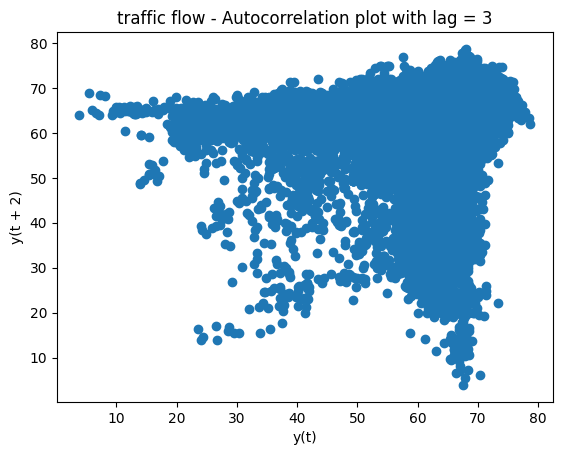

In [5]:
plt.figure()
lag_plot(data['Speed'], lag=2)
plt.title('traffic flow - Autocorrelation plot with lag = 3')
plt.show()

In [6]:
print(len(train_set))
print(len(test_set))

75000
25000


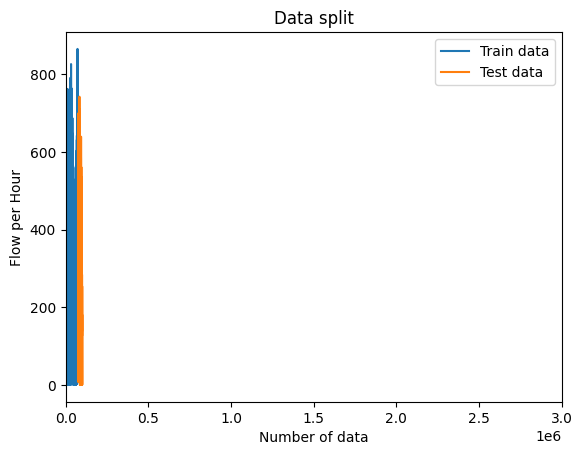

In [7]:
plt.plot(train_set['Flow'].index,train_set['Flow'].values,label="Train data")
plt.xlim(0,7500)
plt.plot(test_set['Flow'].index, test_set['Flow'].values,label="Test data")
plt.xlim(0,3000000)
plt.title('Data split')
plt.xlabel('Number of data')
plt.ylabel('Flow per Hour')
plt.legend()
plt.savefig("traintestdata.png")

# Train ARIMA 

In [8]:
xtrain = train_set['Flow'].values
xtest = test_set['Flow'].values

In [9]:
data_set = data['Flow']
data_set.head()

0    133.0
1    210.0
2    124.0
3    145.0
4    206.0
Name: Flow, dtype: float64

In [10]:
#auto_arima(xtrain, start_p=1, start_q=1,test='adf',max_p=5, max_q=5,m=1,d=1,seasonal=False, start_P=0, D=None, trace=True, error_action='ignore',  suppress_warnings=True, stepwise=True)

In [11]:
history = [x for x in xtrain]
predictions = list()
for t in range(len(xtest)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = xtest[t]
    history.append(obs)
    #print((t/len(xtest))*100)



KeyboardInterrupt: 

In [ ]:
rmse = sqrt(mean_squared_error(xtest, predictions))
rmse

In [ ]:

# plot forecasts against actual outcomes
plt.plot(xtest,color = 'blue',label = "Actual")
plt.plot(predictions, color='red', label = "Prediction")
plt.xlabel('Date')
plt.ylabel("Flow (Vehicale / hour)")
plt.title('Traffic flow with ARIMA')
plt.xlim(1260, 1300)
plt.xticks(np.arange(1260,1300,2),test_set.day[1260:1300:2],rotation = 45)
plt.legend()
plt.savefig('Actual_real.png')
plt.show()

In [ ]:
plt.plot(xtest,color = 'blue',label = "Actual")
plt.plot(predictions, color='red', label = "Prediction")
plt.xlabel('Date')
plt.ylabel("Flow (Vehicale / hour)")
plt.title('Traffic flow with ARIMA')
plt.xlim(0,2500)
plt.xticks(np.arange(0,2500,250), test_set.day[0:2500:250], rotation = 45)
plt.legend()
plt.savefig('total_actual_real.png')
plt.show()

In [ ]:

errors = list()
for i in range(len(xtest)):
 # calculate error
 err = (xtest[i] - predictions[i])**2
 # store error
 errors.append(err)
 # report error
# plot errors
plt.plot(errors)
plt.title('Mean Square error ')
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.savefig('MSE.png')
plt.show()

In [ ]:
r2 = r2_score(xtest, predictions)
rmse = sqrt(mean_squared_error(xtest, predictions))
print('RMSE', rmse, 'R_2', r2)

In [ ]:
residuals = DataFrame(model_fit.resid) 
residuals.plot()
plt.show()

In [ ]:
#we continue to check residuals
residuals.plot(kind='kde') 
plt.show()